Original image size: 6448 bytes
###############################################################
Compressed image size: 8585 bytes
###############################################################


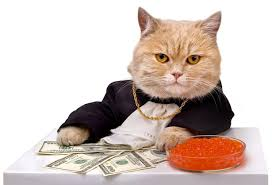

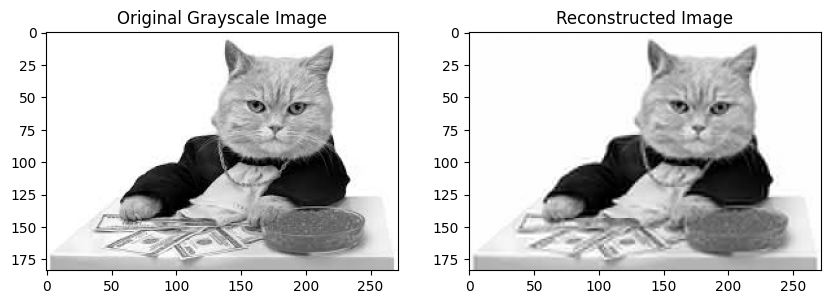

In [2]:
from IPython import get_ipython
from IPython.display import display, Image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import os


def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

image_path = 'imagee.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image from '{image_path}'")
else:
    h, w = img.shape
    h_new, w_new = (h // 8) * 8, (w // 8) * 8
    img = img[:h_new, :w_new]

    compressed = np.zeros_like(img, dtype=np.float32)
    for i in range(0, h_new, 8):
        for j in range(0, w_new, 8):
            block = img[i:i + 8, j:j + 8]
            dct_block = dct2(block)
            dct_block[4:, :] = 0
            dct_block[:, 4:] = 0
            compressed[i:i + 8, j:j + 8] = dct_block

    reconstructed = np.zeros_like(compressed, dtype=np.uint8)
    for i in range(0, h_new, 8):
        for j in range(0, w_new, 8):
            block = compressed[i:i + 8, j:j + 8]
            idct_block = idct2(block)
            reconstructed[i:i + 8, j:j + 8] = np.clip(idct_block, 0, 255)

    reconstructed_path = 'reconstructed_image.jpg'
    cv2.imwrite(reconstructed_path, reconstructed)

    original_size = os.path.getsize(image_path)
    print(f"Original image size: {original_size} bytes")
    print("###############################################################")
    compressed_size = os.path.getsize(reconstructed_path)
    print(f"Compressed image size: {compressed_size} bytes")
    print("###############################################################")

    display(Image(filename=image_path))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed, cmap='gray')
    plt.show()